In [ ]:
# Running in Google Colab? Run this cell
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/master/Module_2/data/M33velocities.csv

# If you're not running in Colab, this file should be in the data directory.
# Change the loading path of the file to include 'data/' when the file is loaded

--2024-06-09 19:13:18--  https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/master/Module_2/data/M33velocities.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 376 [text/plain]
Saving to: ‘M33velocities.csv’

M33velocities.csv   100%[===================>]     376  --.-KB/s    in 0s      

2024-06-09 19:13:18 (7.08 MB/s) - ‘M33velocities.csv’ saved [376/376]



# Galaxy Rotation Curves

## Section 1: Background
![NGC3521](https://github.com/mcstroh/REACHpy/blob/ideaspy_updates/Module_2/images/NGC3521-LRGB-1024c.jpg?raw=1)

We've already talked quite a bit about the rotation curve of the Solar System, but that isn't the only place where rotation curves are useful! Another place where they have frequently been used is in understanding how matter is distributed in galaxies. The equation we used in previous challenge problems

\begin{equation}
v = \sqrt{\frac{G \, M}{R}}
\end{equation}

applies for the mass enclosed within radius R, or

\begin{equation}
v(R) = \sqrt{\frac{G \, M_{enclosed}(R)}{R}}.
\end{equation}

The mass enclosed is the sum of the mass inside of radius $R$. Thus, if you can measure the rotation curve of a galaxy, you can calculate where mass is located within the galaxy.

## Section 2: Loading the data

We will be using a file named `M33velocities.csv` consisting of data from a galaxy named M33. The file contains two columns saved in a comma separated value (csv) format:
 - distance from the center of the galaxy (in kpc), and
 - velocity (in km/s).

Read in the data from the file using NumPy and save the data from each column in separate arrays.

In [ ]:
import numpy as np

# Read in the csv file
data = np.loadtxt('M33velocities.csv', delimiter=',')

distance = data[:,0]
velocity = data[:,1]

# Check that both array sizes match
print(distance.size)
print(velocity.size)

20
20


## Section 3: Create a rotation curve figure

Create a figure with velocity along the y-axis and radius along the x-axis. Title your figure 'M33 Rotation Curve' and properly label both axes.

Text(0.5, 1.0, 'M33 Rotation Curve')

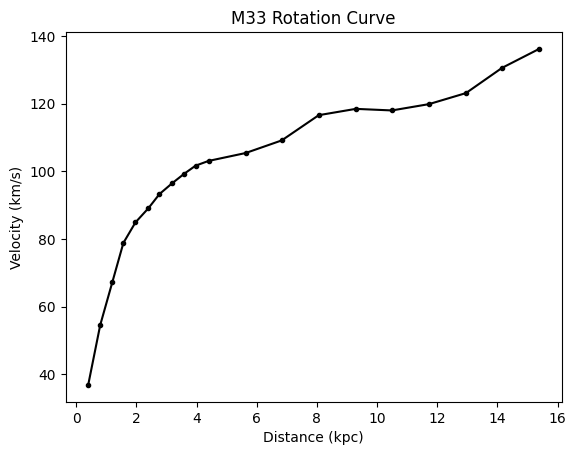

In [ ]:
from matplotlib import pyplot as plt

plt.plot(distance, velocity, marker='.', color='k')
plt.xlabel('Distance (kpc)')
plt.ylabel('Velocity (km/s)')
plt.title('M33 Rotation Curve')

Using numpy, calculate the mass enclosed within each radius, $R$, from the above equation and the velocity and radius data. Pay attention to units while making this calculation.

In [ ]:
# Units we need
G = 6.67430e-11 # m^3 / kg / s^2
km_to_m = 1.e3
kpc_to_m = 3.0856775814914e+16 * 1.e3 # pc to m then kpc to pc

m_r = (velocity * km_to_m)** 2 * (distance * kpc_to_m) / G

Astronomers often express large quantities of mass in terms of solar masses. If you haven't already, convert your mass enclosed into units of solar mass.

In [ ]:
# Convert to solar masses
kg_to_msolar = 1./1.99e30
m_r_solar = m_r * kg_to_msolar

Create a figure showing the mass enclosed (y-axis) against the radius (x-axis). Adjust your title and y-axis as necessary for this new figure.

From images of M33, we see that stars only go out to a radius of 7 kpc. Add a vertical line in this figure at 7 kpc (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axvline.html may be useful).

Text(0.5, 1.0, 'M33 Mass Enclosed')

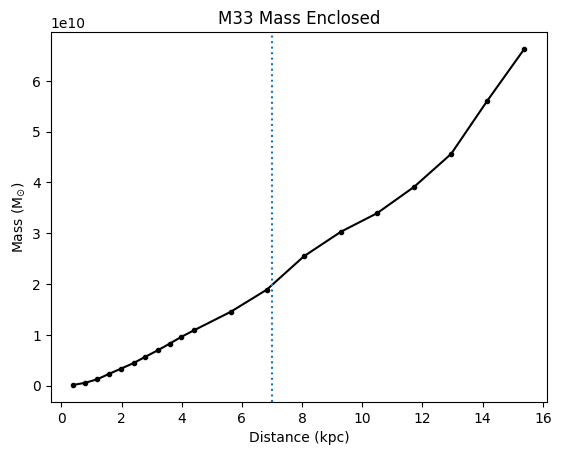

In [ ]:
plt.plot(distance, m_r_solar, marker='.', color='k')
plt.axvline(7., linestyle=':')
plt.xlabel('Distance (kpc)')
plt.ylabel('Mass (M$_{\odot}$)')
plt.title('M33 Mass Enclosed')

What do you notice about the behaviour of the mass of the galaxy as you go to larger and larger radii? Does the mass drop significantly at any point? Change the font color below to learn more!

In [ ]:
# Comment here

You should see that even beyond the 15 kpc outer edge of the galaxy, the mass enclosed still continues to increase.

The mass we can't see is dark matter. You've just uncovered one of the main pieces of evidence indicating that there is a significant amount of matter that we can't see, hidden within M33. The only way we can detect it is in how it exerts a gravitational force on other matter, through this rotation curve.

## Section 4: Solar System comparison

For comparison, use the velocities and radii of planets in the Solar System to calculate the mass enclosed as a function of radius. If you have worked on Challenge 2, you may have already collected this information into NumPy arrays.

This figure may look a little better if you plot the x-axis in Astronomical Units (AU) and change the x-axis to a logarithmic scale (discussed in Challenge 4).

[5.790e+10 1.082e+11 1.496e+11 2.280e+11 7.785e+11 1.432e+12 2.867e+12
 4.515e+12]


(0.5, 2.0)

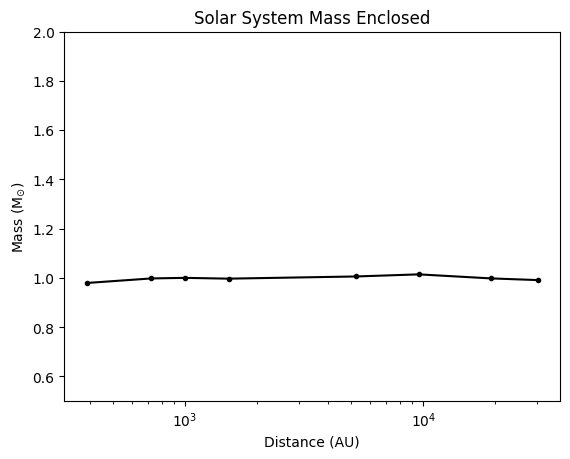

In [ ]:
# Create an array of radii
r = np.array([  57.9, # Mercury
               108.2, # Venus
               149.6, # Earth
               228.0, # Mars
               778.5, # Jupiter
              1432.0, # Saturn
              2867.0, # Uranus
              4515.0  # Neptune
              ])

# Unit conversion
r *= 1e9 # 1e6 km => m
print(r)

# Create an array of reported velocities
v_accepted = np.array([47.4, # Mercury
                       35.0, # Venus
                       29.8, # Earth
                       24.1, # Mars
                       13.1, # Jupiter
                        9.7, # Saturn
                        6.8, # Uranus
                        5.4  # Neptune
                       ])

# Unit conversion km/s => m/s
v_accepted *= 1.e3

# Everthing is in SI units, now we can calculate M
m_r_solar_system = v_accepted ** 2 * r / G * kg_to_msolar

# For clarity, plot in AU and then use log scale
# Students are not requested to perform this step
km_to_au = 1./1.495979e8

# Now plot
plt.plot(r * km_to_au, m_r_solar_system, marker='.', color='k')
plt.xlabel('Distance (AU)')
plt.ylabel('Mass (M$_{\odot}$)')
plt.title('Solar System Mass Enclosed')
plt.xscale('log')
plt.ylim([0.5, 2.])

Does the mass enclosed in the solar system change significantly as you increase your distance from the Sun? How does this compare to the galaxy example?

In [ ]:
# Comment here